In [536]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [537]:
df = pd.read_csv("../data/data.csv")

In [538]:
df.head(5)

,y,x1,x2,x3,x4
0,0.904,75.5,25.2,3343,77.0
1,0.922,78.5,21.8,3001,78.2
2,0.763,78.4,25.7,3101,68.0
3,0.923,77.7,17.8,3543,77.2
4,0.918,84.4,15.9,3237,77.2


In [539]:
df.isna().any()

y     False
x1    False
x2    False
x3    False
x4    False
dtype: bool

In [540]:
df.shape

(25, 5)

In [541]:
df.nunique()

y     22
x1    25
x2    22
x3    25
x4    21
dtype: int64

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       25 non-null     float64
 1   x1      25 non-null     float64
 2   x2      25 non-null     float64
 3   x3      25 non-null     int64  
 4   x4      25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [543]:
df.describe()

,y,x1,x2,x3,x4
count,25.000000,25.000000,25.0000,25.000000,25.000000
mean,0.849720,77.020000,22.2200,4279.600000,74.424000
std,0.101296,6.385204,7.6103,5485.500273,4.829362
min,0.545000,59.200000,14.1000,2415.000000,62.600000
25%,0.763000,74.400000,18.1000,3001.000000,69.800000
50%,0.905000,78.100000,20.6000,3259.000000,77.000000
75%,0.921000,79.200000,23.0000,3350.000000,78.100000
max,0.932000,90.200000,54.4000,30565.000000,79.000000


<Axes: >

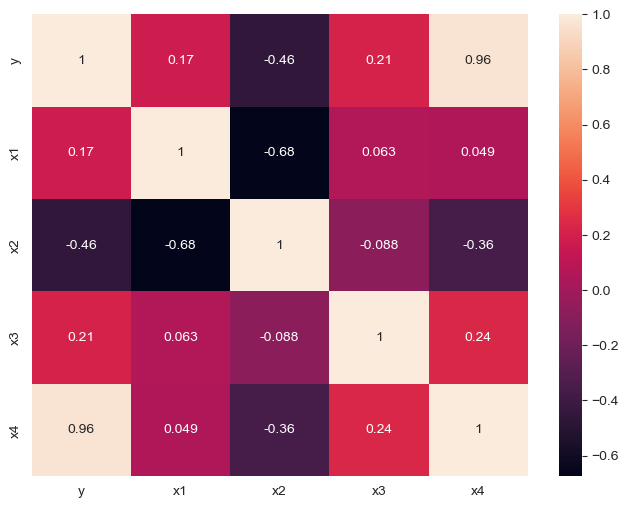

In [544]:
f, ax = plt.subplots(1, figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, ax=ax)

![GMDH](../assets/Structure-of-the-GMDH-algorithm.jpg)

https://www.researchgate.net/figure/Structure-of-the-GMDH-algorithm_fig1_331395382

In [545]:
import numpy as np
from sklearn.model_selection import train_test_split


class GMDH:
    def __init__(self, max_layers=10, stopping_threshold=0.01):
        self.max_layers = max_layers
        self.stopping_threshold = stopping_threshold
        self.layers = []
        self.w = []
        self.rs = []

    @staticmethod
    def func(X_train):
        return np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)

    def fit(self, X_train, y_train):
        curr_layer = 0
        layer_in = self.func(X_train)
        layer_out = y_train.reshape(-1, 1)
        while curr_layer < self.max_layers:
            w = np.linalg.lstsq(layer_in, layer_out, rcond=None)[0]
            pred = np.dot(layer_in, w)
            rs = np.sum((pred - layer_out) ** 2 / np.sum((layer_out - np.mean(layer_out)) ** 2))
            if len(self.rs) > 0 and rs - self.rs[-1] < self.stopping_threshold:
                break

            self.layers.append(layer_in)
            self.w.append(w)
            self.rs.append(rs)
            layer_in = np.concatenate((layer_in, layer_in ** 2), axis=1)
            layer_out = layer_out - pred
            curr_layer += 1

    def predict(self, X_test):
        layer_in = self.func(X_test)
        pred = np.zeros((len(X_test),))

        for _, w in zip(self.layers, self.w):
            pred += np.dot(layer_in, w).ravel()
            layer_in = np.concatenate((layer_in, layer_in ** 2), axis=1)
        return pred


In [546]:
df_copy = df.to_numpy().copy()
df_copy = df_copy[:20]

X = df_copy[:, 1:]  # Features
y = df_copy[:, 0]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [547]:
gmdh = GMDH()
gmdh.fit(X_train, y_train)
y_pred = gmdh.predict(X_test)

In [548]:
def average_approximation_error(actual, pred):
    average_approximation_error = np.mean(np.abs(actual - pred))
    print("Average Approximation Error:", average_approximation_error)

In [549]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


def pred_plot(actual, pred, title=None):
    fig = make_subplots(rows=1, cols=1)
    tr1 = go.Scatter(
        x=np.arange(len(actual)), y=actual,
        mode='lines+markers',
        name="y_test",
    )
    tr2 = go.Scatter(
        x=np.arange(len(pred)), y=pred,
        mode='lines+markers',
        name="y_pred",
    )
    fig.add_trace(tr1, row=1, col=1)
    fig.append_trace(tr2, row=1, col=1)
    fig.layout.title = title
    fig.show()

In [550]:
pred_plot(y_test, y_pred, "Test data")

In [551]:
average_approximation_error(y_test, y_pred)

Average Approximation Error: 0.031051371192896013


In [552]:
gmdh = GMDH()
gmdh.fit(X, y)
y_pred_2 = gmdh.predict(X)

In [553]:
pred_plot(y, y_pred_2, "Initial data")

In [554]:
average_approximation_error(y, y_pred_2)

Average Approximation Error: 0.01460975550946178
